# Import packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re #regular expressions
import math

# Summary:

-Data set is about movies from year 1921 to 2022.

-It containes 250 rows and 13 columns.

-**Columns are**:

rank - Rank of the movie.

name - Name of the movie.

year - Release year.

rating - Rating of the movie.

genre - Genre of the movie.

certificate - Certificate of the movie.

run_time - Total movie run time.

tagline - Tagline of the movie.

budget - Budget of the movie.

box_office - Total box office collection across the world.

casts - All casts of the movie.

directors - Director of the movie.

writers - Writer of the movie.

-There are **no null values** in any cloumn but there are **Not Available** values.

-Numerical columns are **year**, **rank** and **rating**.

-**In preprocessing section**

I convert budget/box_office columns to numerical and fixed some data, so I can find correlations without affecting the over all results.

-**In Statistical operation section**

I found the following information:

1-Correlation between budget and box_office(earnings).

2-Correlation between budget and rating.

3-The most appearing actor/actress in movies.

-**Results:**

-I found no correlation between budget and box_office==> the earnings of a movie does not relate to amount of money spent.

-I found no correlation between budget and rating==> amount of money spent does not affect the movie rating. 

-I found no correlation between box_office and rating==> highy rating does not mean more earnings.

-I found a weak correlation between year and box_office==> movies reached more regions so more people watched them.

-The most appearing actor/actress in movies is **Robert De Niro** which was 9 times.

-**EDA Section:**

what I did:

1-find outliers in **rating/box_office** using **box plot**.

2-relation between **rank** and **rating** using **scatter plot**.

3-relation between **genre** and **rating** using **scatter plot**.

4-show data as percentige of a whole for the first ten **genres** using **pie plot**.

5-distribution of certificate appearings in years using **histogram**.

6-**certificate** categories using **bar plot**.

7-top ten directors using **bar plot**.

-**results**:

-the most appearing genre is **Drame**.

-the director with most movies is **Christopher Nolan**.

-the most appearing certificate is **R** with more tahn 120 appearings in all years.

# Reading Data

In [ ]:
data=pd.read_csv('/content/IMDB Top 250 Movies.csv')

# Basic Information

In [ ]:
data.shape

(250, 13)

In [ ]:
data.columns

Index(['rank', 'name', 'year', 'rating', 'genre', 'certificate', 'run_time',
       'tagline', 'budget', 'box_office', 'casts', 'directors', 'writers'],
      dtype='object')

In [ ]:
data.head()

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"
1,2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola"
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo"
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose


There are **outliers** in column **rating**.

In [ ]:
data.describe()

,rank,year,rating
count,250.000000,250.000000,250.000000
mean,125.500000,1986.360000,8.307200
std,72.312977,25.125356,0.229081
min,1.000000,1921.000000,8.000000
25%,63.250000,1966.250000,8.100000
50%,125.500000,1994.000000,8.200000
75%,187.750000,2006.000000,8.400000
max,250.000000,2022.000000,9.300000


There are **no null values** in any cloumn but there are **Not Available** values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         250 non-null    int64  
 1   name         250 non-null    object 
 2   year         250 non-null    int64  
 3   rating       250 non-null    float64
 4   genre        250 non-null    object 
 5   certificate  250 non-null    object 
 6   run_time     250 non-null    object 
 7   tagline      250 non-null    object 
 8   budget       250 non-null    object 
 9   box_office   250 non-null    object 
 10  casts        250 non-null    object 
 11  directors    250 non-null    object 
 12  writers      250 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 25.5+ KB


# Prepocessing

Convert all *budget* and *box_office* values to numerical values

In [ ]:
#get all rows with EM or RF in the budget
c=0
index=[]
for d in data['budget']:
  if 'RF' in d:
    index.append(c)
  if 'EM' in d:
    index.append(c)
  c+=1  
for i in index:
  print(data.loc[i]['name'],'|',data.loc[i]['budget'])  

Léon: The Professional | RF 115000000
The Boat | EM 32000000
Metropolis | EM 6000000


In [ ]:
data['budget'].value_counts()

Not Available    39
25000000          8
15000000          8
3000000           7
6000000           6
                 ..
EM 32000000       1
72000000          1
250000000         1
1800000           1
325000            1
Name: budget, Length: 128, dtype: int64

In [ ]:
data['box_office'].value_counts()

Not Available    30
28884504          1
31207             1
180906076         1
81379             1
                 ..
170005875         1
5473337           1
60262836          1
2000288           1
424208848         1
Name: box_office, Length: 221, dtype: int64

In [ ]:
def replace_string_with_numbers(column):     
     for value in column:       
       if isinstance(value,str):
        l=re.findall(r'\d+', value)
        if(len(l)<=0): continue
        column=column.replace(value,int(l[0]))     
     return column


In [ ]:
#for budget
data['budget']=data['budget'].replace('Not Available','0')#since number of Not Available values are just 39 out of 250, there impact would be small
#got the actual budget values after searching for theses movies from the following websites:
#
data['budget']=data['budget'].replace('RF\xa0115000000','16000000')
data['budget']=data['budget'].replace('EM\xa032000000','15000000')
data['budget']=data['budget'].replace('EM\xa06000000','32384700')

data['budget']=replace_string_with_numbers(data['budget'])
#for box_office
data['box_office']=data['box_office'].replace('Not Available','0')#since number of Not Available values are just 390out of 250, there impact would be small
data['box_office']=replace_string_with_numbers(data['box_office'])

# Statistical operations

**Here I will find the following information:**

1-Correlation between budget and box_office(earnings).

2-Correlation between budget and rating.

3-The most appearing actor/actress in movies.



**Conclusion:**


**1-**Correlation between **budget** and **box_office**:

Their correlation is very weak(0.272211) which indicates **no correlation**.

**2-**Correlation between **budget** and box **rating**:

Very weak(0.070893)==> **no correlation**.

**3-**The most appearing actor/actress in movies is 'Robert De Niro' which was **9** times.



In [ ]:
data.corr()

,rank,year,rating,budget,box_office
rank,1.000000,-0.056668,-0.854947,-0.099771,-0.199567
year,-0.056668,1.000000,0.032203,0.180282,0.390154
rating,-0.854947,0.032203,1.000000,0.070893,0.179451
budget,-0.099771,0.180282,0.070893,1.000000,0.272211
box_office,-0.199567,0.390154,0.179451,0.272211,1.000000


In [ ]:
#the most appearing actor/actress:
castNames={}
for cast in data['casts']:
  strValue=cast.split(',')
  for v in strValue:
    if v in castNames:
      castNames[v]+=1      
    else:
      castNames[v]=1 
#form columns           
col1=[k for k in castNames.keys()]
col2=[v for v in castNames.values()]
#form the data frame
castData=pd.concat([pd.Series(col1,name='name'),pd.Series(col2,name='count')],axis=1)

In [ ]:
castData.sort_values(by='count',ascending=False)

,name,count
53,Robert De Niro,9
222,Harrison Ford,7
914,John Ratzenberger,7
1,Morgan Freeman,7
162,Tom Hanks,6
...,...,...
1458,Michael Sottile,1
1459,Robert Ruth,1
1460,Lawrence Bender,1
1461,Linda Kaye,1


In [ ]:
data.groupby('year')['certificate'].value_counts(ascending=False)

year  certificate
1921  Passed         1
1924  Passed         1
1925  Passed         1
1926  Passed         1
1927  Not Rated      1
                    ..
2019  PG             1
2020  PG-13          2
2021  PG-13          1
      TV-MA          1
2022  PG-13          1
Name: certificate, Length: 174, dtype: int64

# EDA

<AxesSubplot:>

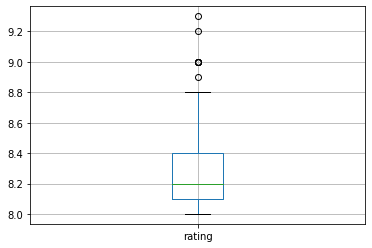

In [ ]:
#outliers of column rating
data.boxplot(column=['rating'])

<AxesSubplot:>

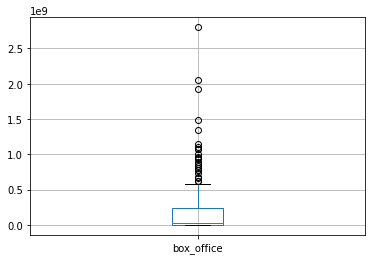

In [ ]:
data.boxplot(column=['box_office'])

**Conclusion:**

Correlation between rank and rating is negative which means:
**Higher rank** indicates **low rating** and that was showen using *corr*() method is Satistical Operation section.


<AxesSubplot:title={'center':'Correlation between rank and rating'}, xlabel='rank', ylabel='rating'>

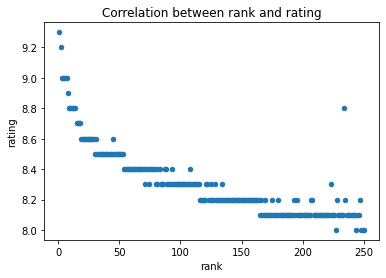

In [ ]:
data.plot.scatter(x='rank',y='rating',title='Correlation between rank and rating')

Text(0, 0.5, 'Rating')

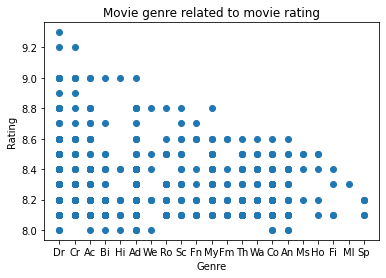

In [ ]:
genreData=data['genre']
c=0
result=[]
for rating in data['rating']:
  val=genreData[c].split(',')    
  for v in val:    
    result.append([v,rating])
  c+=1

genreAbbreviations={'Action':'Ac',
              'Adventure':'Ad',
              'Animation':'An',
              'Biography':'Bi',                                          
              'Crime':'Cr',
              'Comedy':'Co',
              'Drama':'Dr',
              'Film-Noir':'Fi',
              'Fantasy':'Fn',
              'Family':'Fm',
              'History':'Hi', 
              'Horror':'Ho',             
              'Mystery':'My',
              'Music':'Ms',
              'Musical':'Ml',
              'Romance':'Ro',
              'Sport':'Sp',
              'Sci-Fi':'Sc',
              'Thriller':'Th',                                   
              'Western':'We',
              'War':'Wa'
              }            
resultKeys=[genreAbbreviations[k[0]] for k in result]
resultValues=[v[1] for v in result]
plt.scatter(resultKeys,resultValues)
plt.title('Movie genre related to movie rating')
plt.xlabel('Genre')
plt.ylabel('Rating')        

Most movies are R rated, which means restricted. 

**In matplotlib we could do this:**

'''plt.pie(data['certificate'].value_counts(),

labels=data['certificate'].value_counts().index'''

<AxesSubplot:ylabel='genre'>

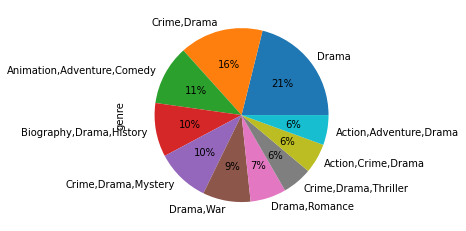

In [ ]:
data['genre'].value_counts().head(10).plot(
    kind='pie', autopct='%1.0f%%')

Text(0, 0.5, 'number of times a count appeared')

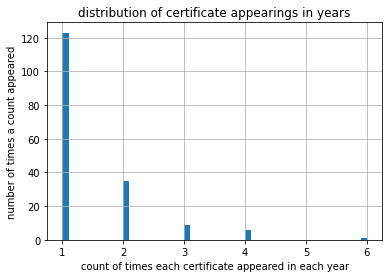

In [ ]:
data.groupby('year')['certificate'].value_counts().hist(bins=50)
plt.title('distribution of certificate appearings in years')
plt.xlabel('count of times each certificate appeared in each year')
plt.ylabel('number of times a count appeared')

<AxesSubplot:xlabel='certificate'>

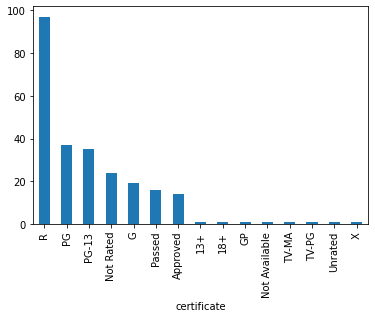

In [ ]:
data.groupby('certificate').size().sort_values(ascending=False).plot(kind = 'bar')

Text(0, 0.5, 'number of movies')

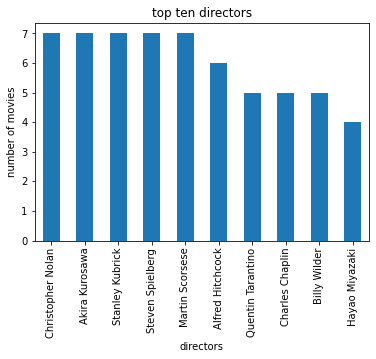

In [ ]:
data.groupby('directors').size().sort_values(ascending=False).head(10).plot(kind = 'bar')
plt.title('top ten directors')
plt.xlabel('directors')
plt.ylabel('number of movies')